In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
data = pd.read_csv('drug200.csv')

In [21]:
# Mapping values in the 'Sex' column
data['Sex'] = data['Sex'].replace({'F': 0, 'M': 1})  # Male=1, Female=0

# Mapping values in the 'BP' column
data['BP'] = data['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

# Mapping values in the 'Cholesterol' column
data['Cholesterol'] = data['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1})

In [11]:
# Define features and target variable
X = data.drop('Drug', axis=1)  # Features
y = data['Drug']  # Target

In [12]:
# Encode the target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features (important for KNN and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Trees': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [16]:
# Store performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

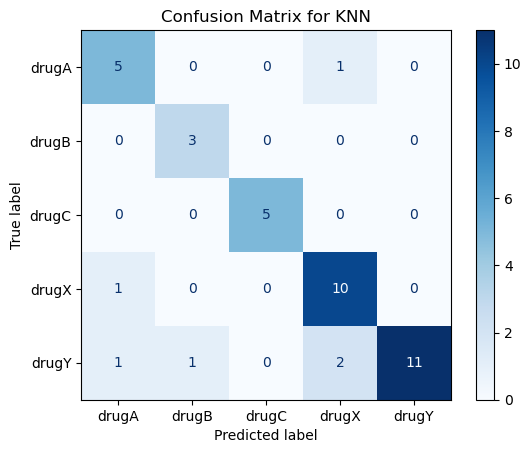

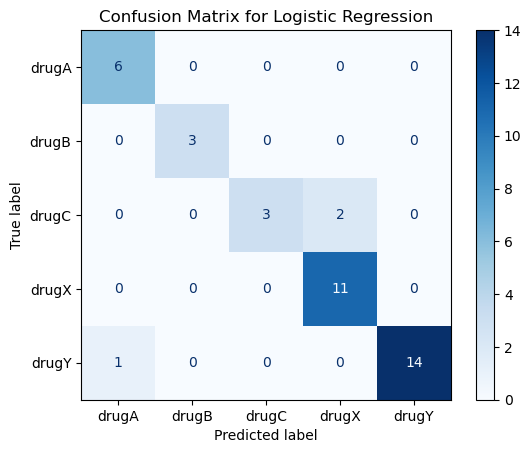

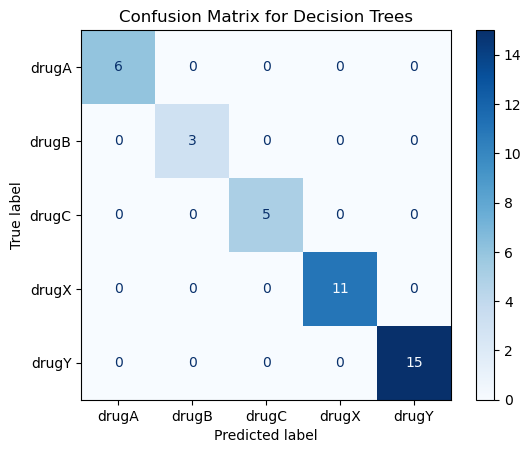

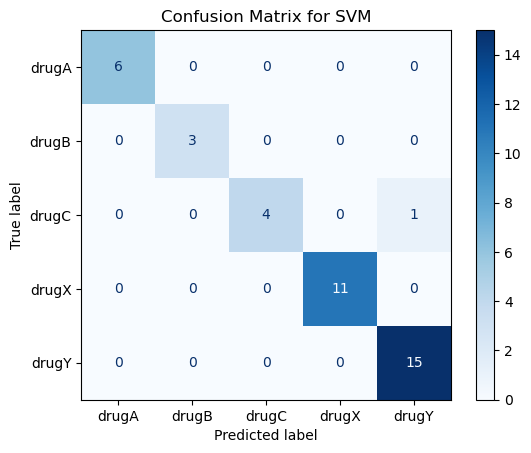

In [17]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1-score'].append(f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [18]:
# Convert performance metrics to DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics)

In [19]:
# Print performance comparison
print(performance_df)

                 Model  Accuracy  Precision  Recall  F1-score
0                  KNN     0.850   0.874931   0.850  0.851145
1  Logistic Regression     0.925   0.936264   0.925  0.921364
2       Decision Trees     1.000   1.000000   1.000  1.000000
3                  SVM     0.975   0.976562   0.975  0.974014


In [20]:
# Highlight the best performing model for each metric
best_accuracy = performance_df.loc[performance_df['Accuracy'].idxmax()]
best_precision = performance_df.loc[performance_df['Precision'].idxmax()]
best_recall = performance_df.loc[performance_df['Recall'].idxmax()]
best_f1 = performance_df.loc[performance_df['F1-score'].idxmax()]

print("\nBest Model for Each Metric:")
print(f"Best Accuracy: {best_accuracy['Model']} with {best_accuracy['Accuracy']:.2f}")
print(f"Best Precision: {best_precision['Model']} with {best_precision['Precision']:.2f}")
print(f"Best Recall: {best_recall['Model']} with {best_recall['Recall']:.2f}")
print(f"Best F1-score: {best_f1['Model']} with {best_f1['F1-score']:.2f}")


Best Model for Each Metric:
Best Accuracy: Decision Trees with 1.00
Best Precision: Decision Trees with 1.00
Best Recall: Decision Trees with 1.00
Best F1-score: Decision Trees with 1.00
